In [2]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np

# Specify the path to your .npy file
file_path = '/content/drive/MyDrive/X_train_padding.npy'

# Load the .npy file
x = np.load(file_path)

# Print the array values
print("Array Values:")
print(x)


Array Values:
[[[-2.85120973e-06  3.35526079e-06  1.59886599e-06 ...  1.46992363e-06
   -5.60908893e-06  4.01809921e-05]
  [-4.69773840e-06  3.35521236e-06  1.43044065e-06 ...  2.47816229e-06
   -3.25939300e-06  4.95803106e-05]
  [-2.68373401e-06  4.02655951e-06  9.26316488e-07 ...  2.47930575e-06
   -7.04526926e-08  4.70623309e-05]
  ...
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]

 [[ 1.04389210e-05 -4.26879387e-06  3.02814669e-06 ... -4.19603680e-07
    2.79208393e-07 -1.41459732e-05]
  [ 1.17815825e-05 -3.93303299e-06  2.69243674e-06 ... -1.42561487e-06
   -3.92174883e-07 -1.56555834e-05]
  [ 1.17814507e-05 -9.11684822e-07  4.03521881e-06 ... -2.43162663e-06
   -1.06355515e-06 -1.69973464e-05]
  ...
  [ 7.518

In [4]:
len(x)

203

In [5]:
x.shape

(203, 12246, 12)

In [6]:
import numpy as np

# Specify the path to your .npy file
file_path = '/content/drive/MyDrive/y_train_padding.npy'

# Load the .npy file
y = np.load(file_path)

# Print the array values
print("Array Values:")
print(y)


Array Values:
[[[  7.80701727  14.62264061  32.20779657 ...  52.83019066   8.73786449
    62.36842453]
  [  7.80701727  14.62264061  32.20779657 ...  52.83019066   8.73786449
    62.36842453]
  [  7.80701727  14.62264061  32.20779657 ...  52.83019066   8.73786449
    62.36842453]
  ...
  [  0.           0.           0.         ...   0.           0.
     0.        ]
  [  0.           0.           0.         ...   0.           0.
     0.        ]
  [  0.           0.           0.         ...   0.           0.
     0.        ]]

 [[  7.19298229  11.32075489  28.05195093 ...  45.28301954   9.61165108
    64.73684728]
  [  7.19298229  11.32075489  28.05195093 ...  45.28301954   9.61165108
    64.73684728]
  [  7.19298229  11.32075489  28.05195093 ...  45.28301954   9.61165108
    64.73684728]
  ...
  [  3.60272638  25.47169924  45.7881403  ... 107.16980696  53.3009702
    70.26316345]
  [  3.60155448  25.47169924  45.77425957 ... 107.16980696  53.3009702
    70.26316345]
  [  3.60038236  25

In [7]:
len(y)

203

In [8]:
y.shape

(203, 12246, 14)

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Assuming X is your input data and Y is your target data
# Convert your numpy arrays to PyTorch tensors
X = torch.tensor(x, dtype=torch.float32)
Y = torch.tensor(y, dtype=torch.float32)

In [10]:
X

tensor([[[-2.8512e-06,  3.3553e-06,  1.5989e-06,  ...,  1.4699e-06,
          -5.6091e-06,  4.0181e-05],
         [-4.6977e-06,  3.3552e-06,  1.4304e-06,  ...,  2.4782e-06,
          -3.2594e-06,  4.9580e-05],
         [-2.6837e-06,  4.0266e-06,  9.2632e-07,  ...,  2.4793e-06,
          -7.0453e-08,  4.7062e-05],
         ...,
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00]],

        [[ 1.0439e-05, -4.2688e-06,  3.0281e-06,  ..., -4.1960e-07,
           2.7921e-07, -1.4146e-05],
         [ 1.1782e-05, -3.9330e-06,  2.6924e-06,  ..., -1.4256e-06,
          -3.9217e-07, -1.5656e-05],
         [ 1.1781e-05, -9.1168e-07,  4.0352e-06,  ..., -2.4316e-06,
          -1.0636e-06, -1.6997e-05],
         ...,
         [ 7.5182e-06,  2

In [11]:
Y

tensor([[[  7.8070,  14.6226,  32.2078,  ...,  52.8302,   8.7379,  62.3684],
         [  7.8070,  14.6226,  32.2078,  ...,  52.8302,   8.7379,  62.3684],
         [  7.8070,  14.6226,  32.2078,  ...,  52.8302,   8.7379,  62.3684],
         ...,
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]],

        [[  7.1930,  11.3208,  28.0520,  ...,  45.2830,   9.6117,  64.7368],
         [  7.1930,  11.3208,  28.0520,  ...,  45.2830,   9.6117,  64.7368],
         [  7.1930,  11.3208,  28.0520,  ...,  45.2830,   9.6117,  64.7368],
         ...,
         [  3.6027,  25.4717,  45.7881,  ..., 107.1698,  53.3010,  70.2632],
         [  3.6016,  25.4717,  45.7743,  ..., 107.1698,  53.3010,  70.2632],
         [  3.6004,  25.4717,  45.7604,  ..., 107.1698,  53.3010,  70.2632]],

        [[  3.5992,  25.4717,  45.7465,  ...

In [12]:
import torch

# Check if CUDA (GPU support) is available
if torch.cuda.is_available():
    print("GPU is available!")
else:
    print("GPU is not available. Using CPU.")

GPU is not available. Using CPU.


In [13]:
import torch
import torch.nn as nn

class MyLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(MyLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0.detach(), c0.detach()))

        # Apply the fully connected layer to each time step
        out = self.fc(out)

        return out


# Define the input and target dimensions
input_dim = 12
output_dim = 14
hidden_dim = 64
num_layers = 3
batch_size = 64
# Create the LSTM model
model = MyLSTMModel(input_dim, hidden_dim, num_layers, output_dim)
if torch.cuda.is_available():
  model=model.to('cuda')
# Print the model architecture
print(model)

# Define your loss function (e.g., Mean Squared Error) and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
dataset = TensorDataset(X, Y)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

MyLSTMModel(
  (lstm): LSTM(12, 64, num_layers=3, batch_first=True)
  (fc): Linear(in_features=64, out_features=14, bias=True)
)


Epoch [1/10], Avg. Loss: 1746.6117
Epoch [2/10], Avg. Loss: 1754.2153
Epoch [3/10], Avg. Loss: 1741.6612
Epoch [4/10], Avg. Loss: 1695.6598
Epoch [5/10], Avg. Loss: 1734.2982
Epoch [6/10], Avg. Loss: 1597.0347
Epoch [7/10], Avg. Loss: 1554.6324
Epoch [8/10], Avg. Loss: 1688.1618
Epoch [9/10], Avg. Loss: 1589.7403
Epoch [10/10], Avg. Loss: 1562.9106


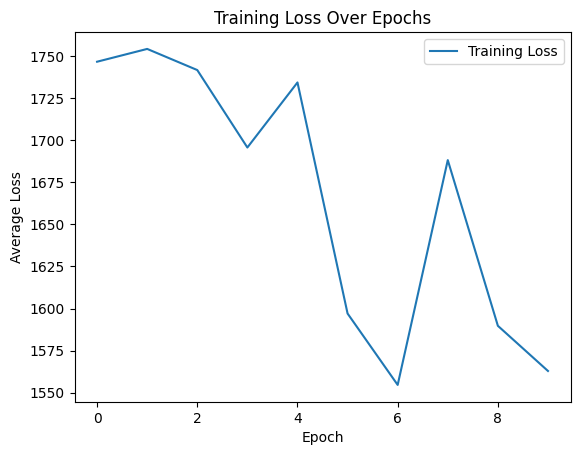

In [14]:
import matplotlib.pyplot as plt
# Training loop with loss plotting
num_epochs = 10
all_losses = []

for epoch in range(num_epochs):
    epoch_loss = 0.0

    for batch_data, batch_target in dataloader:
        if torch.cuda.is_available():
          batch_data, batch_target  = batch_data.to('cuda'), batch_target.to('cuda')
        model.train()
        optimizer.zero_grad()
        outputs = model(batch_data)
        loss = criterion(outputs, batch_target)
        loss.backward()
        optimizer.step()

        # Accumulate the loss for the current batch
        epoch_loss += loss.item()

    # Calculate average loss for the epoch
    avg_epoch_loss = epoch_loss / len(dataloader)

    # Print the average loss for the epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Avg. Loss: {avg_epoch_loss:.4f}')

    # Save the average loss for plotting
    all_losses.append(avg_epoch_loss)

# Plot the training loss
plt.plot(all_losses, label='Training Loss')
plt.savefig('LSTM.png')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.legend()
plt.show()


conclusion : its very bad so you want to merge cnn to this lstm to gain better insights for higher accuracy